# En XGB modell för att estimera priset på en diamant

## 0. Importer
Först kommer alla importer som behövs för projektet

In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

## 1. Förberedning av data
Vi börjar med att ladda in datasetet

In [148]:
df = pd.read_csv('diamonds.csv')

original_length = df.shape[0]

# Dubeltter och en kolumn med index
df.drop_duplicates(inplace=True)
df.drop('Unnamed: 0', axis='columns', inplace=True)

## 1.1 Visualisering
Vi skapar några grafer för att visualisera datan

Här skapar vi en funktion som jämför varje kolumn med den diamantens pris

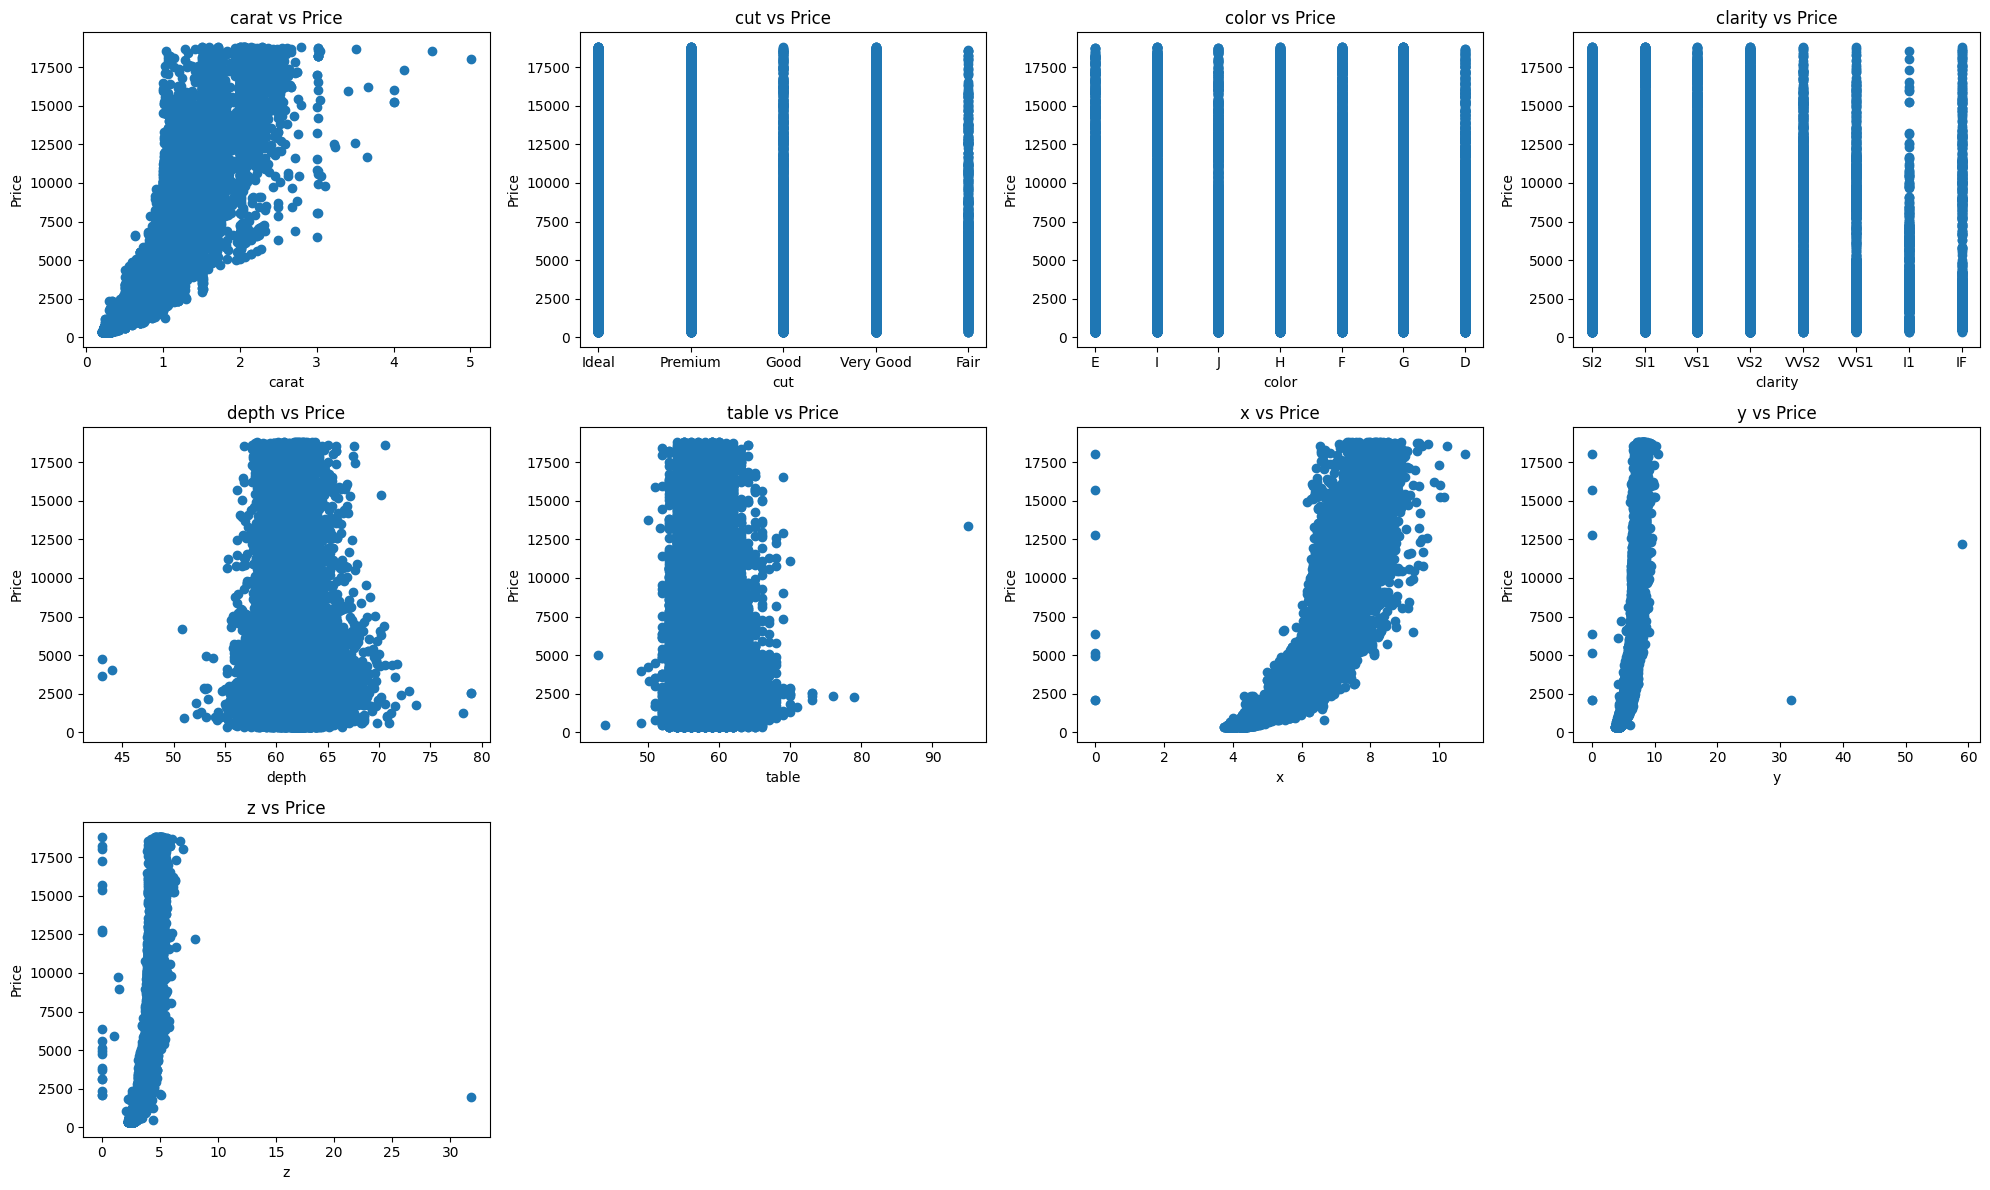

In [149]:
def plot_statistics():
    '''Rita en jämförelse mellan pris och alla andra kolumner'''

    plt.figure(figsize=(20, 12))
    for n, column in enumerate(df.drop(columns='price').columns, 1):
        plt.subplot(3, 4, n)
        plt.scatter(df[column], df['price'])
        plt.xlabel(column)
        plt.ylabel('Price')
        plt.title(f'{column} vs Price')

    plt.tight_layout()

plot_statistics()

## 1.2 Förbehandling

Vi ser att det på flera platser finns punkter som sticker ut mycket från resten av datan, och därför vill vi sortera bort dem.

Från grafen ser vi att några av diamanternas y eller z är noll. Det finns också några som har väldigt stora värden. En diamant som saknar en dimension, eller har en orimlig storlek är inte så bra att ta med i träningsdatan, så vi tar bort dem.

In [150]:
df.drop(df[df['y'] == 0].index, inplace=True)
df.drop(df[df['y'] > 20].index, inplace=True)

df.drop(df[df['z'] < 2].index, inplace=True)
df.drop(df[df['z'] > 20].index, inplace=True)

Även i kolumnen med "depth" och "table" så finns det värden som sticker ut mycket

In [151]:
df.drop(df[df['depth'] < 47.5].index, inplace=True)
df.drop(df[df['depth'] > 77.5].index, inplace=True)

df.drop(df[df['table'] < 40].index, inplace=True)
df.drop(df[df['table'] > 77.5].index, inplace=True)

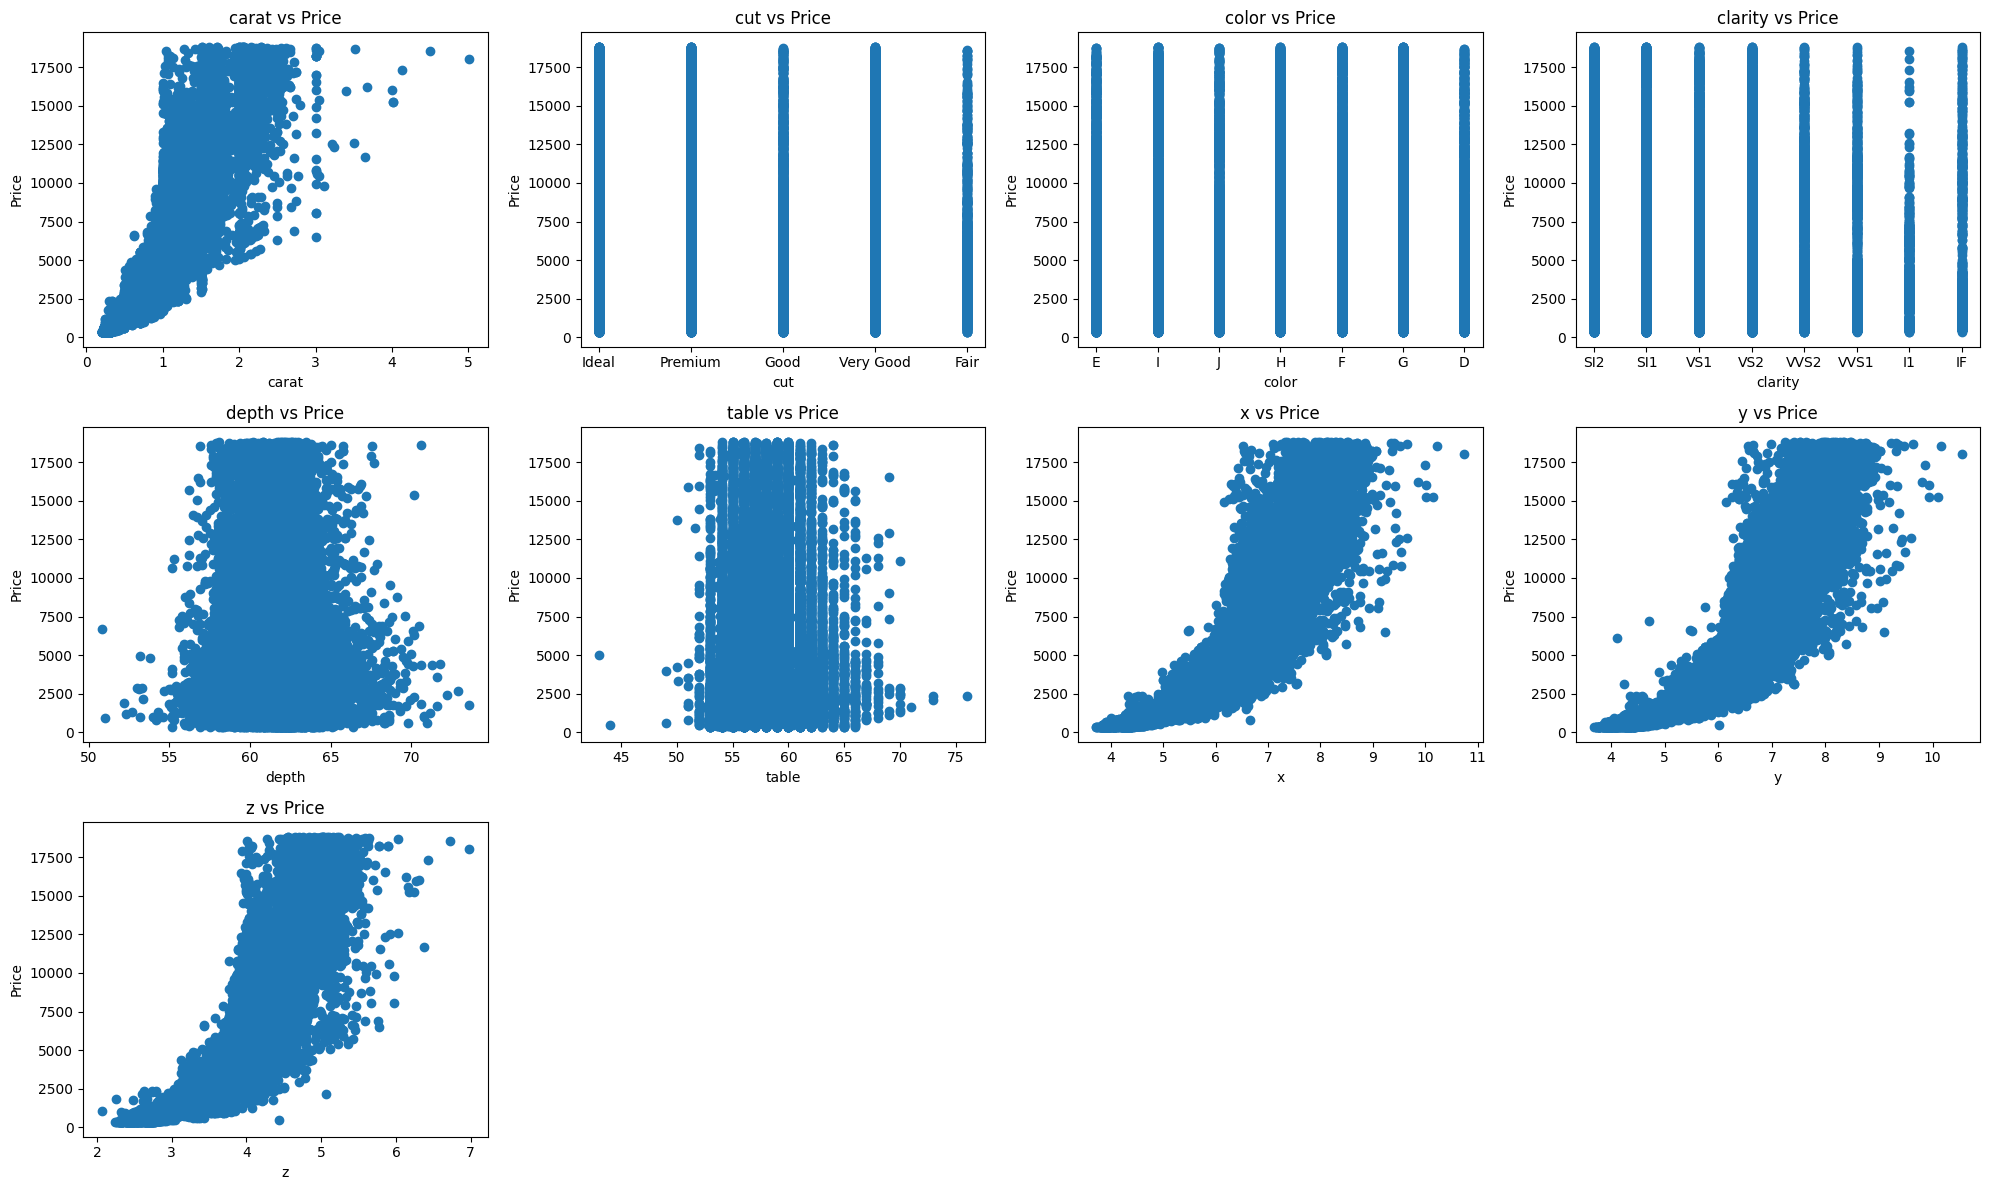

In [152]:
plot_statistics()

Under hela processen har vi bara förlorat 34 diamanter

In [153]:
print(f'{original_length - df.shape[0]} eller {round((original_length - df.shape[0]) / original_length, 4)}% av datapunkter borttagna')

34 eller 0.0006% av datapunkter borttagna


Nu delar vi upp den för träning och testning

In [154]:
X = df.drop(columns='price')
y = df['price']

X_train, X_text, y_train, y_text = train_test_split(X, y)

## 2. Skapa en modell